# MathAData - Géométrie : Droite et produit scalaire


# Accouchement : alerter en cas de risque pour la santé du foetus


!!! abstract But du TP  
Dans ce Notebook, nous allons construire un algorithme qui aide les soignants lors de l'accouchement. Pour la santé du nouveau-né, on doit déterminer si l'état d'un foetus est **normal** ou **alarmant**. Pour cela on analyse le rythme cardiaque du foetus.  
!!!


!!! tip Exécuter une cellule  
Pour commencer, cliquez sur la cellule de code ci-dessous puis appuyez sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">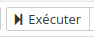</span> ou les touches <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>.  
Lorsque le code aura été executé, un nombre apparaîtra entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!
!!! warning  SOS <details><summary>  
   Rien ne se passe ? Ou tu veux récupérer tes réponses précédentes ? Clique ici  </summary>   
    
Clique sur le bouton **deux petites flèches**<span style="display: inline-block; margin: auto 1rem; vertical-align: middle">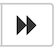</span>sur la barre d'outils en haut du notebook.  
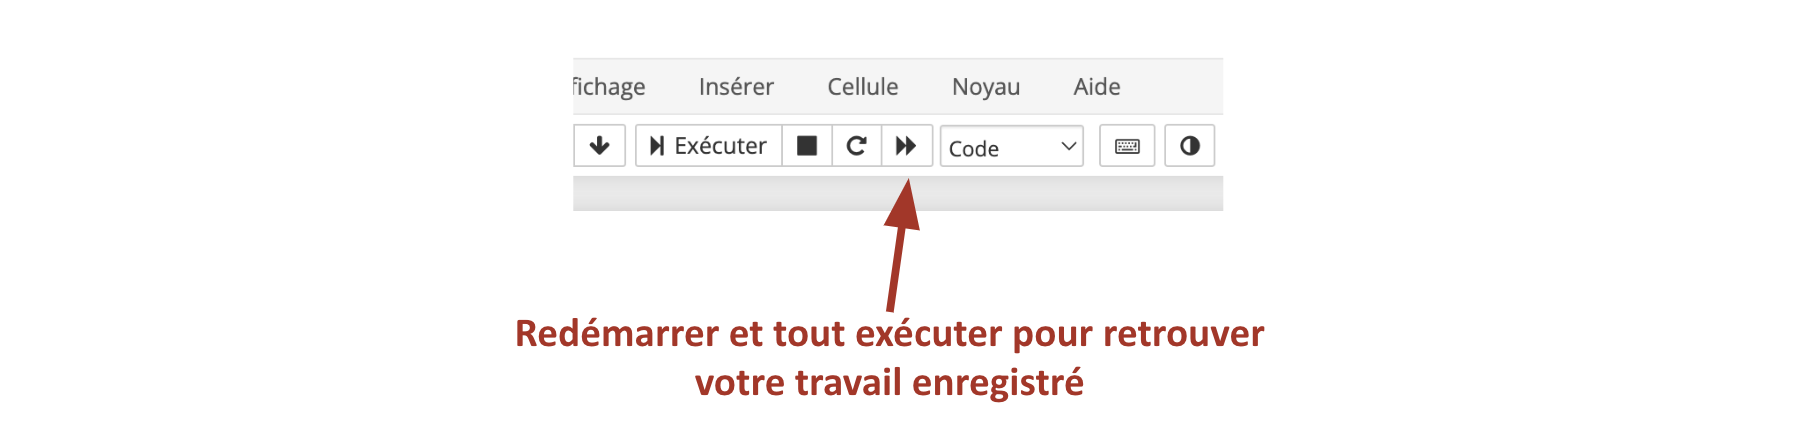
Clique ensuite sur le bouton rouge "Relancer et exécuter toutes les cellules"
</details>  
!!!


In [ ]:
try:
    from utilitaires_foetus import *
    from utilitaires_P_GEO_droite_produit_scalaire import *
except ModuleNotFoundError:
    from challenges.foetus.utilitaires import *
    from chapters.P_GEO_droite_produit_scalaire.utilitaires import *

## A. Rythme cardiaque du foetus


!!! abstract Qu'est ce qu'un **enregistrement du rythme cardiaque** ?  
Un **enregistrement du rythme cardiaque** donne la fréquence cardiaque en fonction du temps, exprimé en nombre de battements de coeur par minute.  
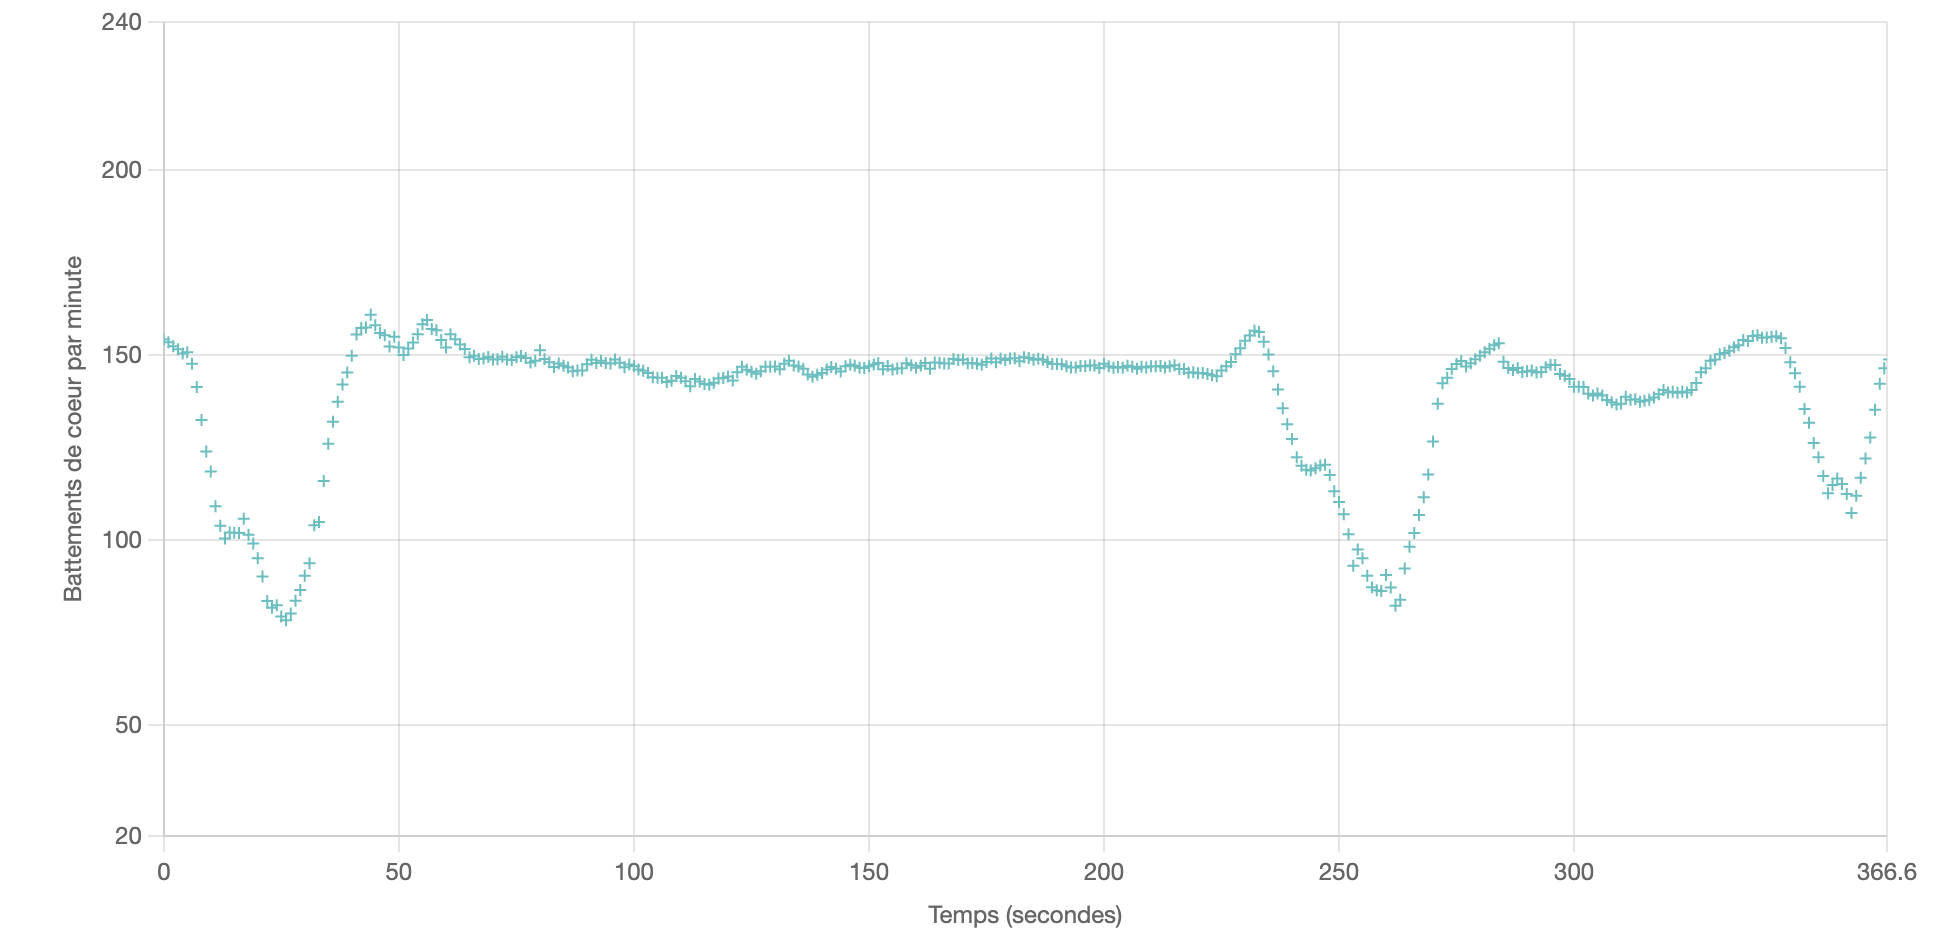  
Sur l'image ci-dessus chaque point représente la fréquence cardiaque à un instant donné.  
!!!


!!! tip Base de données  
Nous avons environ 400 enregistrements.  
**Exécutez la cellule suivante** pour afficher la base de donnée. Vous pouvez cliquer sur une ligne pour afficher l'enregistrement correspondant et vous déplacer avec les flèches haut et bas du clavier.  
!!!


In [ ]:
affichage_banque()

validation_execution()

!!! question 1) Combien de cas ALARMANTS y a-t-il parmi les 10 premiers cas ?
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!


In [ ]:
nombre_ALARMANT = 3

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_nombre()

!!! question 2) Combien de cas contient la base de données au total ?
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!


In [ ]:
nombre_total_cas = 453

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_nombre_total()

## B. Point de départ


!!! tip Fonctionnement d'un algorithme  
Un algorithme reçoit une donnée, effectue des opérations, et donne une réponse.  
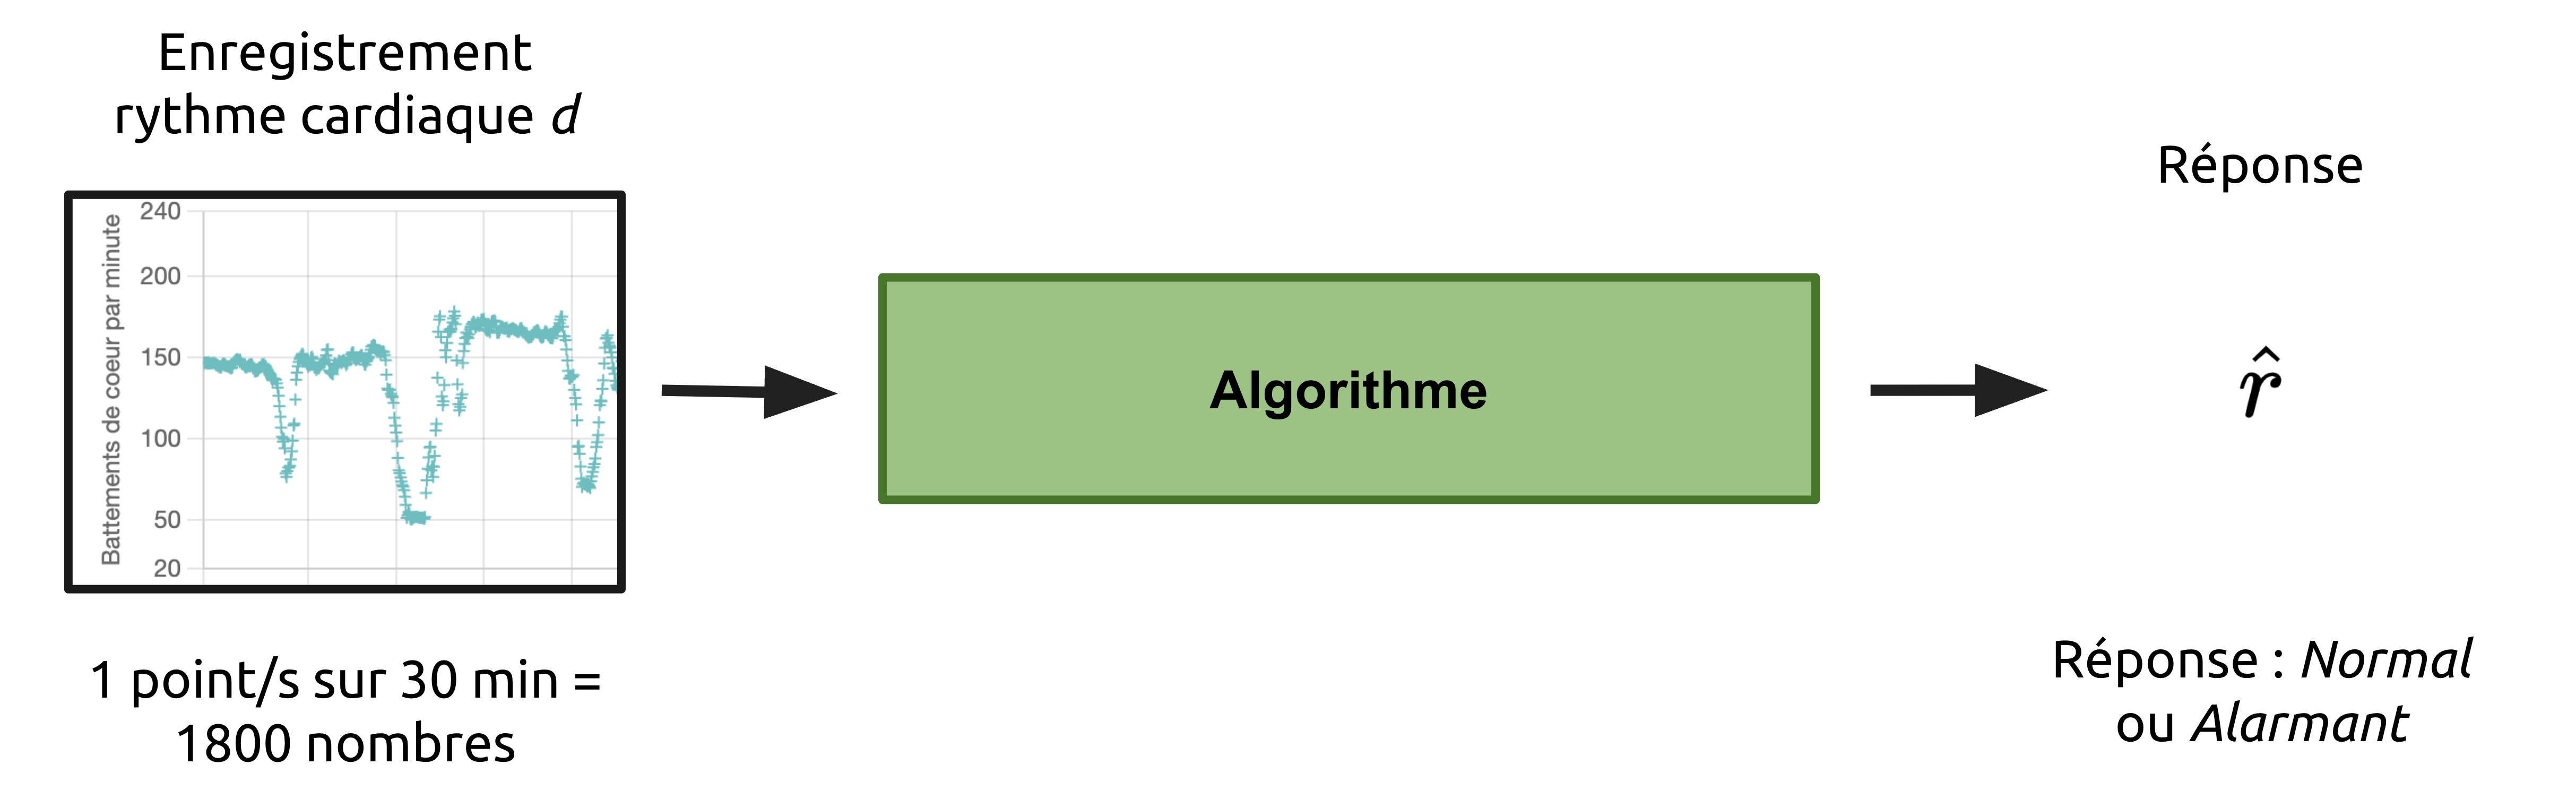  
!!!
!!! abstract Algorithme fainéant : Renvoyer toujours Normal.   
LucIA ne veut pas se fatiguer et propose un algorithme très simple **qui renvoie toujours Normal**.  
!!!


In [ ]:
import utilitaires_common

def algorithme(d):
    return "Normal"

validation_execution_algo_fixe()

!!! question 3) Que répond l'algorithme fainéant pour ces trois cas ?
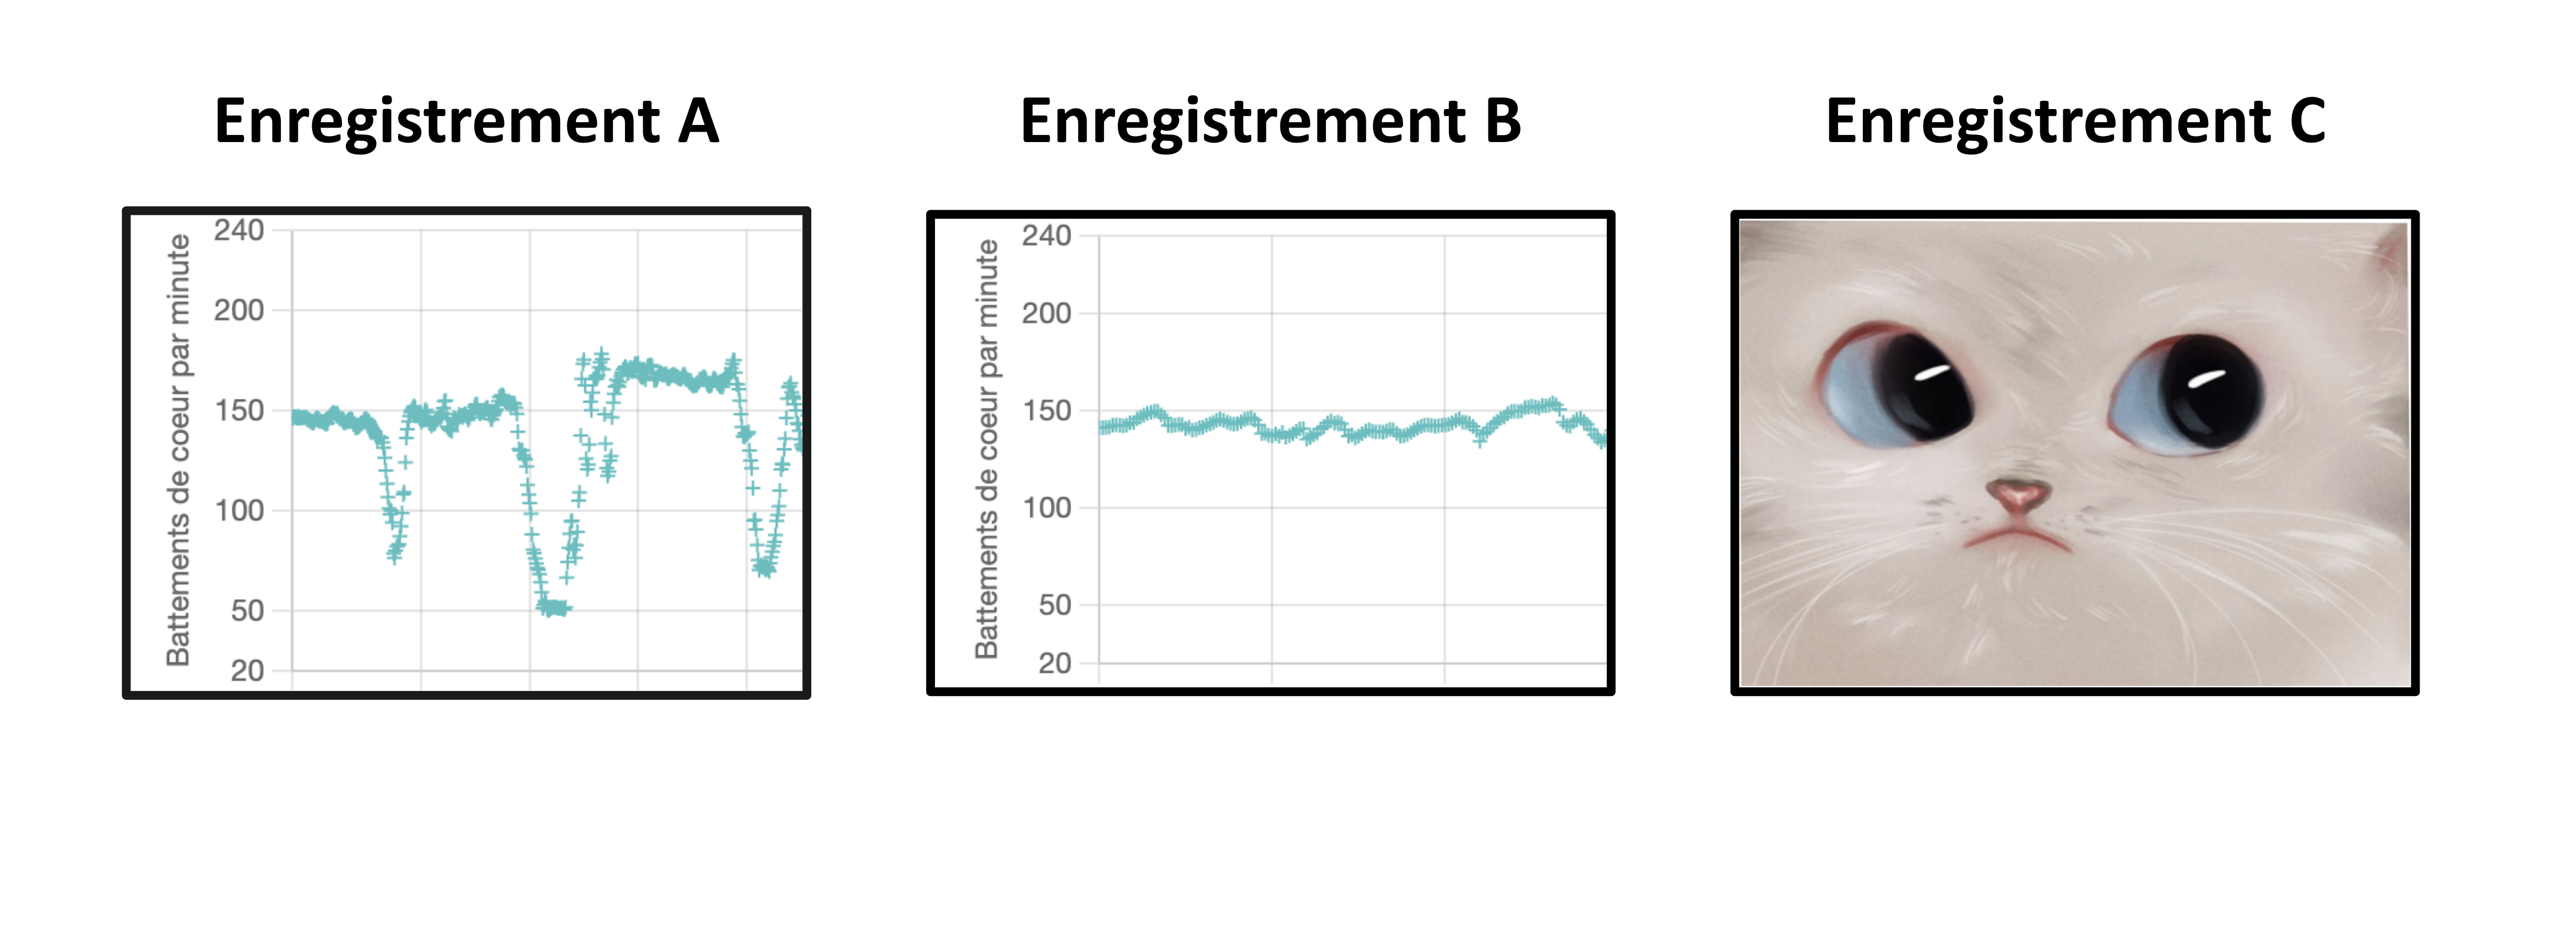  
**Remplacez les `...`** dans la cellule suivante par votre réponse  **puis exécutez**.  
!!!


In [ ]:
Reponse_Donnee_A = normal
Reponse_Donnee_B = normal
Reponse_Donnee_C = normal

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_faineant()

!!! info Le pourcentage d'erreur : un moyen d'évaluer votre algorithme  
Plus le pourcentage d'erreur de votre algorithme est bas meilleur est votre solution.  
  
$$\text{erreur} = \frac{\text{Nombre de cas mal classés}} {\text{Nombre total de cas}} \times 100\%.$$  
Un cas mal classé est un enregistrement pour lequel l'algorithme a donné une estimation différente de la vraie classe de l'enregistrement :  
$$\hat r \neq r.$$  
!!!


In [ ]:
affichage_banque(showPredictions=True)

validation_execution_calcul_score()

!!! question 4) Quel est le pourcentage d'erreur de l'algorithme sur les 10 premiers cas ?
Calculez le pourcentage d'erreur de l'algorithme sur les 10 premiers cas.  
**Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!


In [ ]:
erreur_10 = 30

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_fixe()

!!! tip Taux d'erreur sur tous les enregistrements 
**Exécutez la cellule suivante** pour calculer le pourcentage d'erreur sur l'ensemble des 400 enregistrements.  
!!!


In [ ]:
calculer_score_etape_1()

!!! info Un enregistrement cardiaque pour un ordinateur ?  
Pour l'ordinateur, l'enregistrement cardiaque est une série de nombres. Nous avons 1 mesure par seconde c'est à dire que la $n$ième valeur correspond à la fréquence cardiaque  après $n$ secondes.  
Exécutez la cellule suivante pour afficher le tableau des valeurs de l'enregistrement ci-dessus.  
!!! 


In [ ]:
affichage_tableau(d)
affichage_html(d)
validation_execution_affichage_tableau()

!!! question 5) Quelle est la fréquence cardiaque après 3 secondes ?
Regardez le tableau des valeurs de la fréquence cardiaque et indiquez dans la cellule suivante la valeur après 3 secondes.  
!!!


In [ ]:
frequence = 100.96

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_frequence()

## C. Caractéristiques


### Calcul des caractéristiques


!!! tip Caractéristique d'un cas  
Pour diminuer notre erreur, notre algorithme doit maintenant utiliser l'enregistrement au lieu de répondre au hasard.  
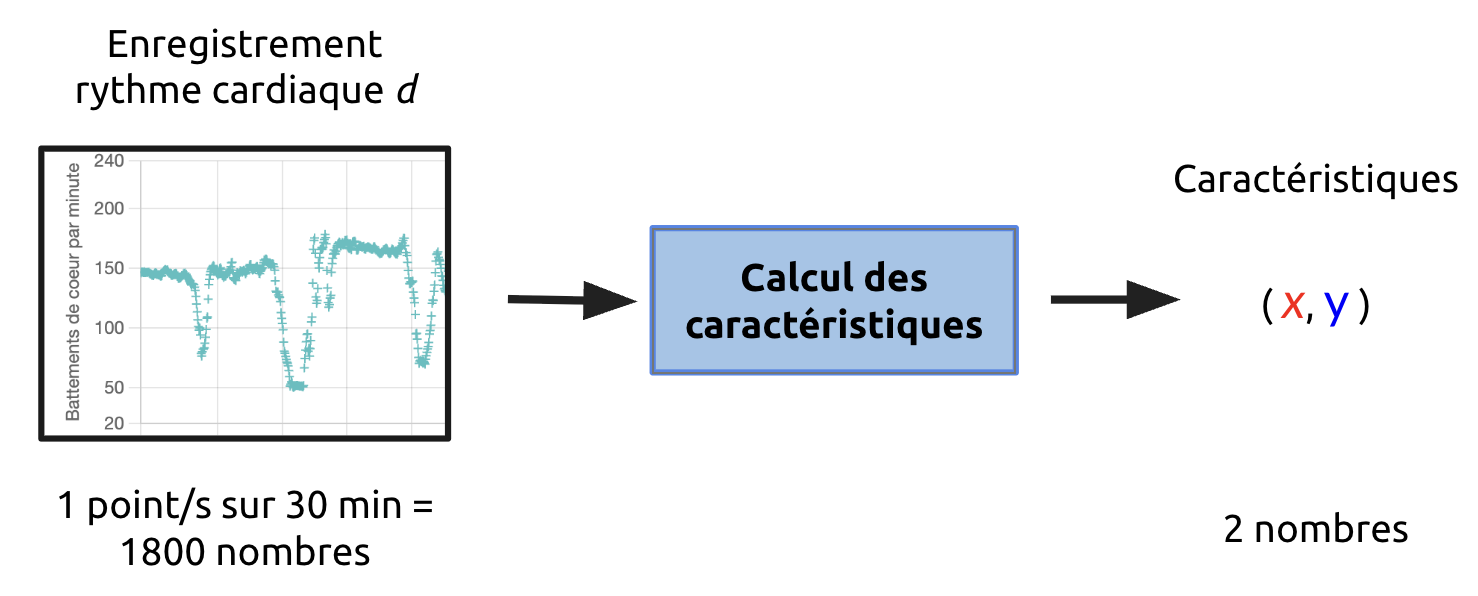  
Les caractéristiques notées $x, y$ permettent de simplifier les données de l'enregistrement en gardant que deux nombres.  
!!!


### Visualisation dans le plan


!!! info Visualisation dans le plan et nuages de points  
Nous avons maintenant 2 valeurs $(x, y)$ associées à chaque cas et nous pouvons placer chacun dans un plan en utilisant x et y comme coordonnées. Nous allons maintenant étudier la répartition dans le plan des cas Normaux et des cas ALARMANTS.   
  
Plus notre caractéristique est discriminante, plus on peut observer deux nuages (groupes) de points distincts.  
  
**Exécutez la cellule suivante** pour afficher les points correspondant aux 200 premiers enregistrements de l'ensemble d'entraînement.  
!!!


In [ ]:
tracer_200_points()
validation_execution_200_points()

!!! question 6) Quel nuage de point correspond à quelle classe ?
A votre avis, les points de couleur bleue correspondent à la classe Normal ou à la classe ALARMANT ?  
**Remplacez les `...`** dans la cellule suivante avec Normal ou ALARMANT dans le bon ordre **puis exécutez**.  
!!!


In [ ]:
classe_points_bleus = ...
classe_points_oranges = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_couleur()

## D. Classification


!!! info Classification  
La classification est la dernière étape de l'algorithme.  
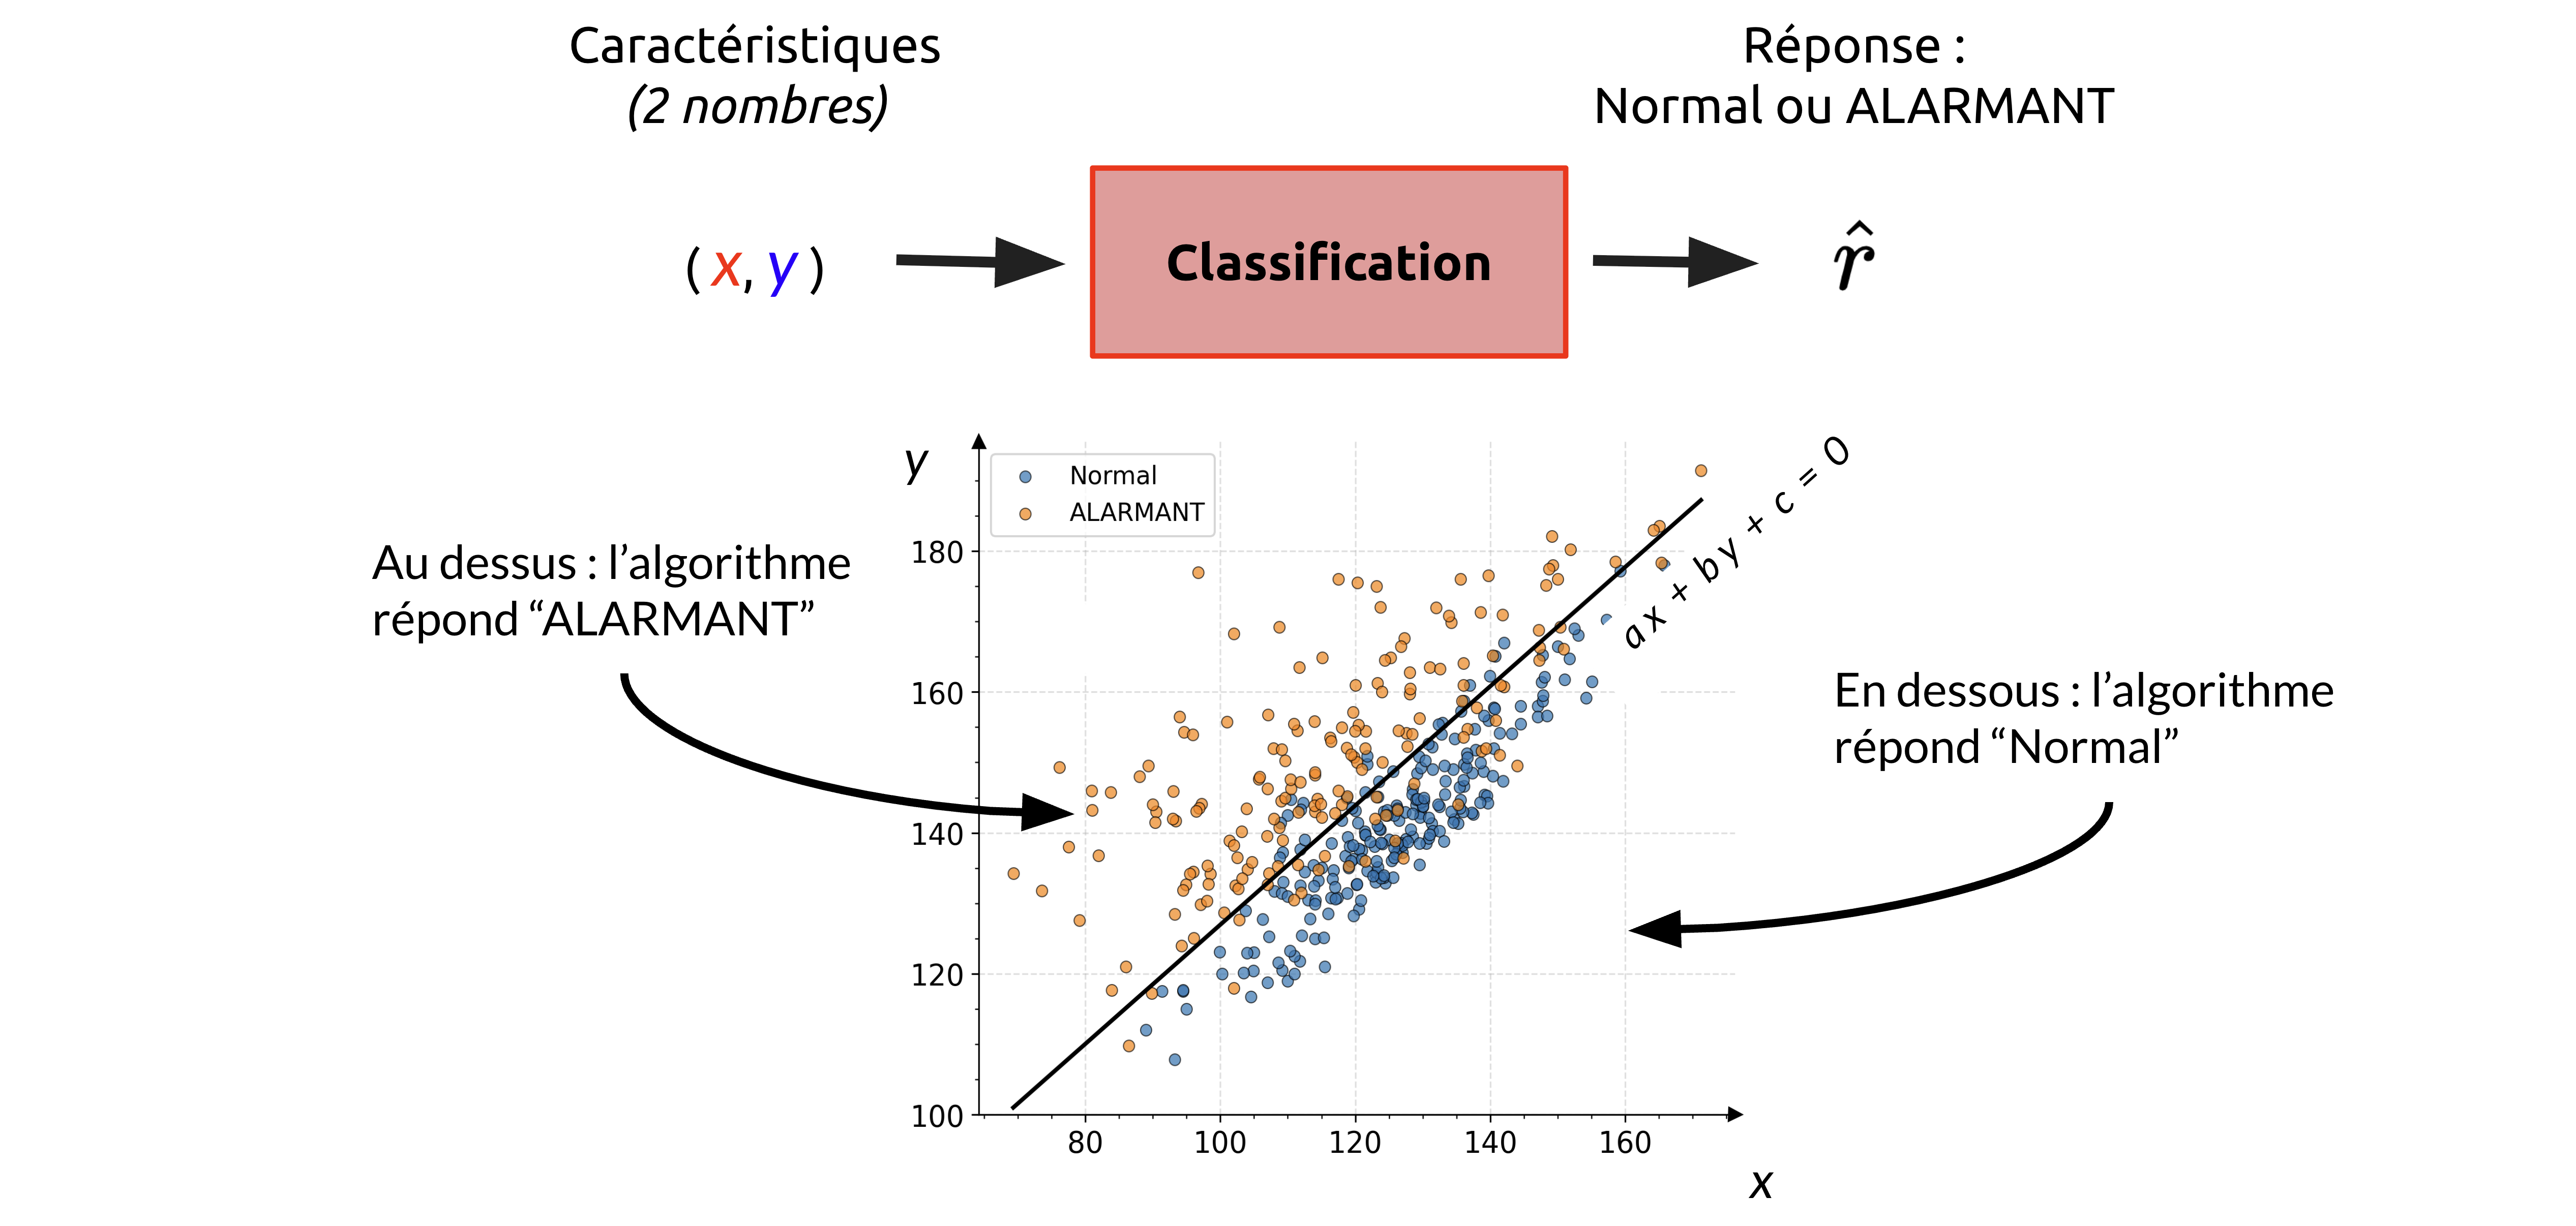  
!!!
!!! info Algorithme de classification  
La droite de classification permet de découper le plan en 2.  
- Les points au-dessus de la droite sont classés comme ALARMANTS par l'algorithme.  
- Les points en dessous de la droite sont classés comme Normaux par l'algorithme.  
!!!


In [ ]:
tracer_10_points_droite()
validation_execution_10_points()

!!! question 7) Quel est le pourcentage d'erreur sur ce schéma ?
Calculez le pourcentage d'erreur pour ces 10 cas et cette droite en sachant que les points au dessus de la droite sont classés comme cas ALARMANTS par l'algorithme et ceux en dessous comme des cas Normaux.  
**Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!


In [ ]:
erreur_10 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_droite()

!!! info Découpage du plan par une droite  
En deux dimensions, on peut utiliser une droite pour séparer les points en deux groupes. Une équation cartésienne de la droite est de la forme  
$$ax + by + c= 0.$$  
Une droite peut être définie par un **vecteur directeur** $\vec{u} = \begin{pmatrix} u_{x} \\ u_{y} \end{pmatrix}$ et par un point $A$.  
**Exécutez la cellule suivante** pour voir le découpage par une droite en deux classes.  
!!!


In [ ]:
tracer_points_droite_vecteur(directeur=True)
validation_execution_tracer_points_droite_vecteur()

!!! question 8) Trouvez une droite permettant d'obtenir moins de 21% d'erreur
Ajustez les paramètres $u_x$, $u_y$, $x_A$ et $y_A$ pour trouver une bonne droite séparatrice. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite.  
Quand vous aurez trouvé une bonne droite, **exécutez la cellule suivante** pour passer à la suite.  
!!!


In [ ]:
calculer_score_droite()

### Comment déterminer la position d'un point par rapport à la droite ?
!!! abstract Comment l'ordinateur fait-il pour savoir si un point est au dessus de la droite ?  
L'ordinateur ne peut pas faire de comparaison visuellement. Il doit donc faire des calculs avec les coordonnées des points et l'équation de la droite.  
!!!
#### Introduction du vecteur normal 


!!! quote Propriété   
Un vecteur normal de la droite d'équation $ ax+by+c=0 $ est $\vec{n} = \begin{pmatrix} a \\ b \end{pmatrix}$.  
!!!
!!! question 9) Coordonnées d'un vecteur normal $\vec{n}$
Lisez les valeurs de $a$ et $b$ dans l'équation de la figure précédente, et **remplacez les `...`** dans la cellule suivante par les bonnes valeurs de $\vec{n}$ **puis exécutez**.  
!!!


In [ ]:
n = ...


# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_decouverte_vecteur_normal()

!!! question 10) Produit scalaire $\vec{n} \cdot \vec{u}$
Calculez le produit scalaire $\vec{n} \cdot \vec{u}$. On rappelle que $\vec u$ est le vecteur directeur défini sur la figure précédente.  
!!!


In [ ]:
produit_scalaire_n_u = ...


# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_produit_n_u()

!!! info À partir de maintenant : classification grâce au vecteur normal $\vec n$  
Nous utiliserons à partir de maintenant le vecteur normal $\vec{n}$ pour déterminer si un point est au-dessus ou en dessous de la droite.
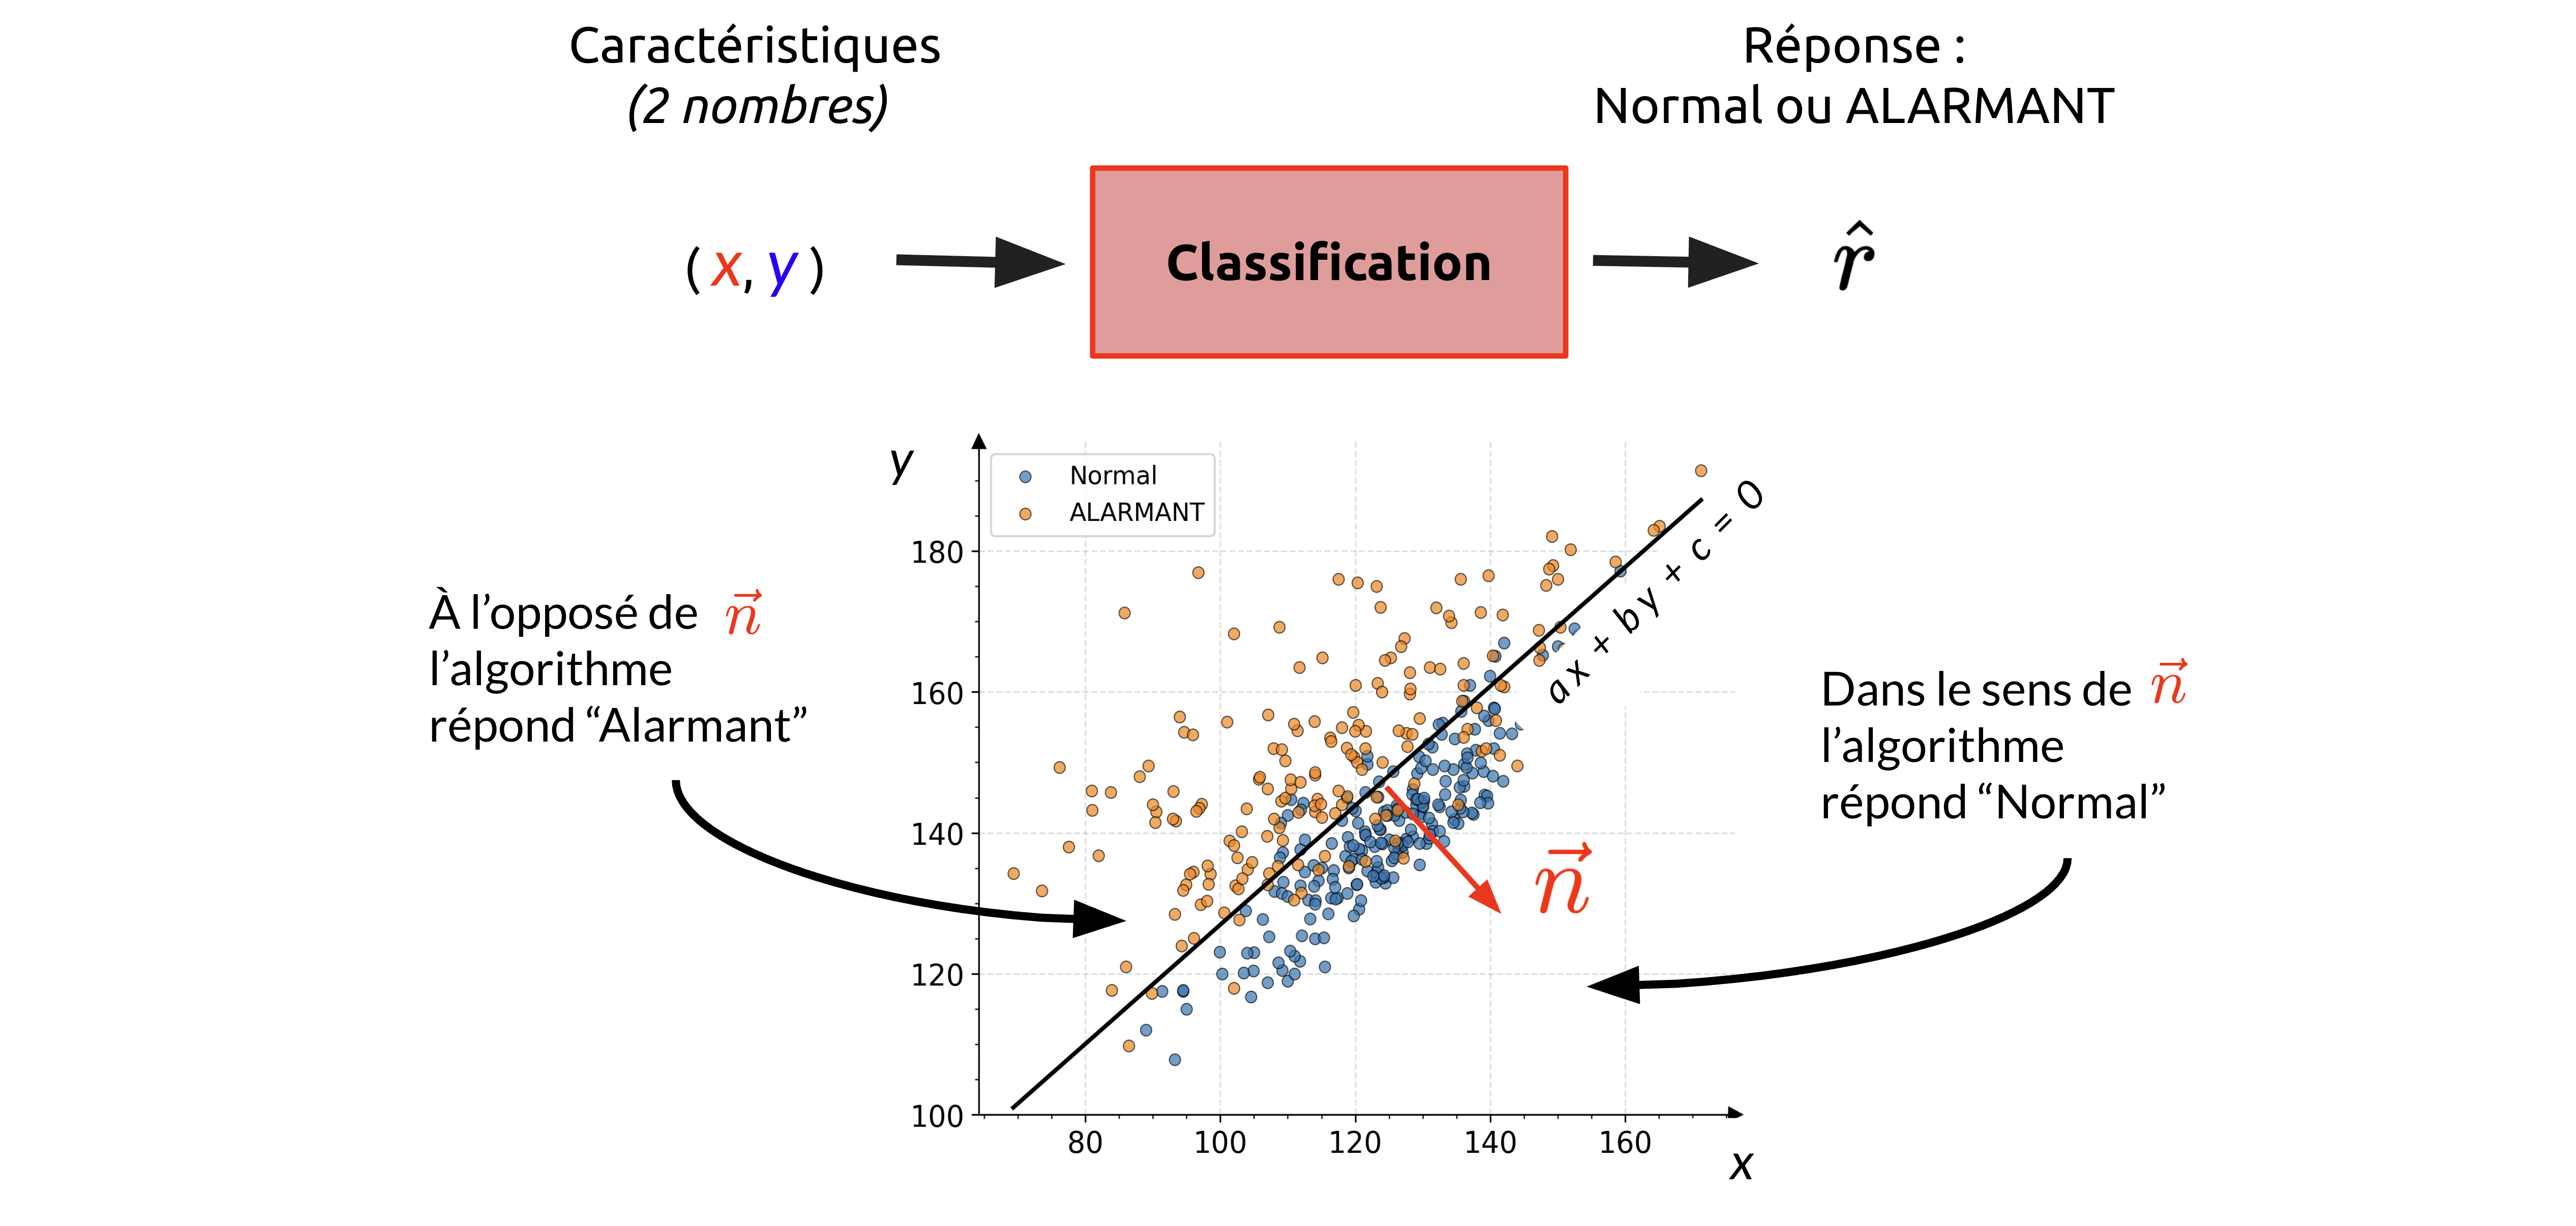  
!!!


In [ ]:
tracer_points_droite_vecteur(normal=True,reglage_normal=True,save=False)
validation_execution_tracer_points_droite_vecteur_2() 

!!! question 11) Trouvez une droite permettant d'obtenir moins de 21% d'erreur
Ajustez les paramètres $a$, $b$, $x_A$ et $y_A$ pour trouver une bonne droite séparatrice. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite.  
Quand vous aurez trouvé une bonne droite, **exécutez la cellule suivante** pour passer à la suite.  
!!!


In [ ]:
calculer_score_droite_normal()

!!! question 12) Quelle est la classe estimé dans la direction de $\vec{n}$ ?
On se rappele que l'algoritme partage le plan en deux zones délimités par la droite et que chaque zone correspond à une classe. On se demande quelle est la classe estimée par l'algorithme dans la zone où pointe le vecteur $\vec{n}$ ?  
Remplacez les `...` dans la cellule suivante par Normal ou ALARMANT **puis exécutez**.  
!!!


In [ ]:
classe_sens_vecteur_normal = ...
classe_sens_oppose_vecteur_normal = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_classe_direction_n()

#### Déterminer si un point est au dessus ou au dessous de la droite de classification


!!! info Produit scalaire, vecteur normal et direction  
$A$ est un point sur la droite  et $\vec{n} = \begin{pmatrix} a \\ b \end{pmatrix}$ un vecteur normal à la droite. Le point $M$ représente un cas inconnu.  
Le signe du produit scalaire $\vec{n} \cdot \vec{{AM}}$ donne la position de $M$ par rapport à la droite.   
  
**Exécutez** la cellule ci-dessous pour visualiser le calcul du produit scalaire.  
!!!


In [ ]:
produit_scalaire_exercice()
validation_execution_produit_scalaire_exercice()

!!! question 13) Quel est le produit scalaire $\vec n \cdot \vec{AM}$ pour $M(40, 30)$ ?
Déplacez le point M et observez comment le produit scalaire change.  
Remplissez dans la cellule suivante la valeur du produit scalaire $\vec n \cdot \vec{AM}$ pour $M(40, 30)$.  
!!!


In [ ]:
produit_scalaire = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_produit_scalaire()

!!! question 14) Quel est le produit scalaire $\vec n \cdot \vec{AM}$ pour $M(25, 35)$ ?<details><summary>
 Calculez à la main le produit scalaire $\vec n \cdot \vec{AM}$ pour $M(25, 35)$ et **remplacez les `...` dans la cellule suivante par sa valeur**.  
Besoin d'aide ? Clique ici  </summary> Il y a deux étapes : 1) Calculer les coordonnées du vecteur $\vec{AM}$.  2) Appliquer la formule du produit scalaire.</details>  
!!!


In [ ]:
produit_scalaire = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_produit_scalaire_2()

!!! tip Appliquons ce qu'on vient de travailler à nos cas  
**Exécutez la cellule suivante** pour visualiser de nouveau les nuages de points et la droite.  
Retrouvez la droite obtenue précédement. On se rappele aussi que l'algorithme classe comme ALARMANTS les points au-dessus de la droite et comme cas Normaux les points en dessous de la droite.  
!!!


In [ ]:
tracer_points_droite_vecteur(normal=True,reglage_normal=True)
validation_execution_tracer_points_droite_vecteur_3()

!!! info un cas est représenté par le point $ (40; 20) $. Est-ce un cas Normal ou un cas ALARMANT ?   
Il est possible de regarder le graphique pour avoir la réponse. Nous voulons ici obtenir la réponse par le calcul comme l'ordinateur :   
- **Étape 1 :** Calculer les coordonnées du vecteur $\vec{AM}$.  
- **Étape 2 :** Calculer le produit scalaire $\overrightarrow{n}\cdot \overrightarrow{AM}$.  
- **Étape 3 :** En déduire où est le point $M$ par rapport à la droite.  
- **Étape 4 :** En déduire la classe estimée du point M.  
!!!


!!! question 15) Étape 1 :  Calculez les coordonnées du vecteur $\vec{AM}$
**Remplacez les `...`** dans la cellule suivante par les bonnes valeurs **puis exécutez**.  
!!!


In [ ]:
x_M = ...
y_M = ...
x_A = ...
y_A = ...
vecteur_AM = ( ... , ... )

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_normal_2a()

!!! question 16) Étape 2 :  Calculez le produit scalaire $\overrightarrow{n}\cdot \overrightarrow{AM}$
**Remplacez les `...`** dans la cellule suivante par les bonnes valeurs **puis exécutez**.  
!!!


In [ ]:
produit_scalaire_n_AM = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_normal_2b()

!!! question 17) Étape 3 : Où est M ?
 Si le produit scalaire $\overrightarrow{n}\cdot \overrightarrow{AM}$ est positif, $M$ est du côté où $\overrightarrow{n}$ pointe.  
 Si le produit scalaire est négatif, $M$ est de l'autre côté.  
Sinon $M$ est sur la droite.  
  
**QCM :** Dans ce cas le point $M$ est...  
A) du côté où pointe $\vec n$  
B) de l'autre côté  
C) sur la droite  
**Remplacez les `...`** dans la cellule suivante par **A**, **B** ou **C** pour indiquer la bonne réponse.  
!!!


In [ ]:
# Répondre au QCM par 'A', 'B' ou 'C'
reponse = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_normal_2c()

!!! question 18) Étape 4 : Conclure sur la classe estimée du cas
Déduire de la réponse précédente la classe estimée par l'algorithme du point $M$ et remplacer les `...` dans la cellule suivante par Normal ou ALARMANT.  
!!!


In [ ]:
classe_de_M = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_normal_2d()

## E. Essayons de trouver 2 meilleures caractéristiques !


!!! tip Nouvelles zones de l'image  
**Exécutez la cellule suivante** pour voir les nouvelles zones de l'image que nous avons choisies.  
!!!


In [ ]:
affichage_zones_custom_2(A_1, B_1, A_2, B_2)
validation_execution_def_caracteristiques_ripou()

!!! question 19) Pour la zone rouge quelle image aura la moyenne de niveau de gris la plus élevée ?
Remplacez les `...` dans la cellule suivante par 2 ou 7.  
!!!


In [ ]:
reponse = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_2cara_comprehension()

!!! tip Modifier les caractéristiques  
En changeant les zones on modifie les caractéristiques. On peut ainsi améliorer la classification des images.   
 **Exécute la cellule suivante** pour voir la position dans le plan des images et règle la droite de classification pour atteindre 11% d'erreur.   
!!!


In [ ]:
affichage_zones_custom_2(A_1, B_1, A_2, B_2,normal=True,trace=True)

In [ ]:
# Executer la fonction suivante pour valider la question quand ton score est sous 11%
calculer_score_custom_droite_2cara()

!!! question 20) Changer les zones choisies pour définir vos propres caractéristiques
**Exécutez la cellule suivante** puis sélectionnez deux zones sur l'image. Les caractéristiques $x$ et $y$ seront la moyenne des pixels dans chacune des zones.  
Cliquez sur le bouton zone1 ou zone2 pour choisir la zone à sélectionner, puis cliquez sur l'image et laissez appuyé jusqu'à avoir selectionné la zone souhaitée.  
!!!


!!! warning SOS <details> <summary>Rien ne se passe ? Clique ici  </summary>  
 Avec la souris sélectionne une zone dans une des images :   
-clique sur zone 2    
-sélectionne une zone   
-clique sur zone 1  
-selectionne une zone  
  
 L'enjeu est de trouver des zones permettant de différencier les 2 et les 7.  </details>  
!!!


In [ ]:
afficher_customisation()
validation_execution_caracteristiques_custom()

!!! question 21) Trouvez la meilleure droite
Ajustez les paramètres $a$, $b$, $x_A$ et $y_A$ pour trouver une bonne droite séparatrice. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite.  
**Exécutez la cellule suivante** pour passer à la suite quand vous aurez moins de 6% d'erreur. Il faut pour ça trouver deux bonnes zones et ajuster la droite.  
!!!


In [ ]:
calculer_score_custom_droite()

!!! abstract Fin du Notebook  
Dans ce TP, vous avez :   
  
- Utilisé deux caractéristiques pour chaque image.  
- Placé les images dans un plan en utilisant ces deux valeurs comme coordonnées.  
- Utilisé une droite pour séparer les points en deux groupes.  
- Optimisé les paramètres de la droite pour minimiser votre erreur.  
  
Continuez à chercher des bonnes zones pour diminuer votre pourcentage d'erreur. Vous pouvez faire jusqu'à moins de 3% d'erreur !  
!!!
